<a href="https://colab.research.google.com/github/Chanzwastaken/datascience-salaries_KNN_and_KMeansCluster/blob/main/ds_salaries_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing library and data source**

### importing the necessary library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


###read the data

In [ ]:
df = pd.read_csv('ds_salaries.csv')

In [ ]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


# **Data Cleansing**

### Remove null value (if exist)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


there is no Null value

### removing column that not relevant

In [ ]:
df = df.drop(['employee_residence', 'salary','salary_currency',df.columns[0]] , axis=1)

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L


### Detect the outliers and remove them

In [ ]:
# Outlier Detection

def find_outliers(df):
    global q_list
    q_list = []
    sorted_data = df.sort_values()
    for q, p in {"Q1": 25, "Q2": 50, "Q3": 75}.items():
        # Calculate Q1, Q2, Q3 and IQR.
        Q = np.percentile(sorted_data, p, interpolation = 'midpoint')
        q_list.append(Q)
        print("{}: {} percentile of the {} values is,".format(q,p,df.name), Q)

    global Q1, Q2, Q3

    Q1 = q_list[0]
    Q2 = q_list[1]
    Q3 = q_list[2]

    IQR = Q3 - Q1
    print("Interquartile range is", IQR)

    # Find the lower and upper limits as Q1 – 1.5 IQR and Q3 + 1.5 IQR, respectively
    global low_lim, up_lim

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    print("low_limit is", low_lim)
    print("up_limit is", up_lim)

    # Find outliers in the dataset
    outliers =[]
    for x in sorted_data:
        if ((x> up_lim) or (x<low_lim)):
             outliers.append(x)
    print("\nOutliers in the dataset is", outliers)

find_outliers(df.salary_in_usd)

Q1: 25 percentile of the salary_in_usd values is, 62726.0
Q2: 50 percentile of the salary_in_usd values is, 101570.0
Q3: 75 percentile of the salary_in_usd values is, 150000.0
Interquartile range is 87274.0
low_limit is -68185.0
up_limit is 280911.0

Outliers in the dataset is [324000, 325000, 380000, 405000, 412000, 416000, 423000, 450000, 450000, 600000]


<ipython-input-244-8557efa8c429>:9: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q = np.percentile(sorted_data, p, interpolation = 'midpoint')


In [ ]:
# Dropping outliers from data

clean_data = df[(df.salary_in_usd < up_lim) & (df.salary_in_usd > low_lim)]
print("Minimum salary in USD: {}".format(clean_data.salary_in_usd.min()))
print("Maximum salary in USD: {}".format(clean_data.salary_in_usd.max()))

Minimum salary in USD: 2859
Maximum salary in USD: 276000


### and then we got the cleaned data

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 606
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         597 non-null    int64 
 1   experience_level  597 non-null    object
 2   employment_type   597 non-null    object
 3   job_title         597 non-null    object
 4   salary_in_usd     597 non-null    int64 
 5   remote_ratio      597 non-null    int64 
 6   company_location  597 non-null    object
 7   company_size      597 non-null    object
dtypes: int64(3), object(5)
memory usage: 42.0+ KB


# **KNN**

###read and copy the cleaned data

In [ ]:
data = clean_data.copy()

###encode the label (change to numeric)

In [ ]:
# Label Encoder
# Selecting categorical columns
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size']

# Creating label encoders for categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,2,2,21,79833,0,12,0
1,2020,3,2,40,260000,0,29,2
2,2020,3,2,7,109024,50,18,1
3,2020,2,2,46,20000,0,20,2
4,2020,3,2,37,150000,50,48,0


###Split the dataset into training and testing sets.

In [ ]:
# Create feature and target arrays
X = data.drop(['company_size'], axis=1)
y = data['company_size']
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size = 0.2, random_state=42)

###calculate the accuracy

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
# Predict on dataset which model has not seen before
print(knn.predict(X_test))
# Calculate the accuracy of the model
print(knn.score(X_test, y_test))


[1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 2 1 1 1 1 0 0 1 1 1
 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2 1 0 1 1 1 0 1 0 2 1 2 1 1 1 1
 0 0 2 1 1 2 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 1 1 1 1 0 1 0 2]
0.4666666666666667


accuracy 46%

###visualize using plt

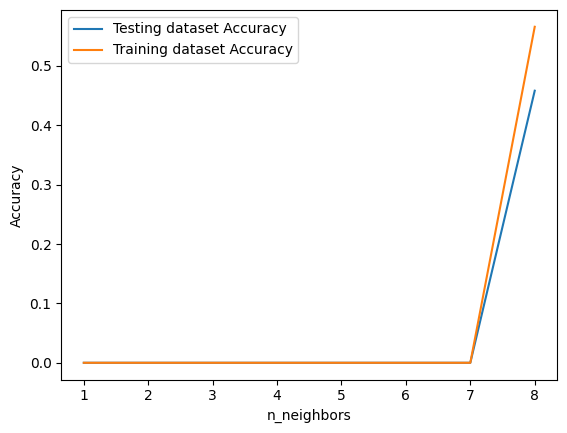

In [ ]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over K values
for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
# Compute training and test data accuracy
train_accuracy[i] = knn.score(X_train, y_train)
test_accuracy[i] = knn.score(X_test, y_test)
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# **K-Means Clustering**


### read and copy the cleaned data

In [ ]:
data = clean_data.copy()

### encode the label (change into numerical)

In [ ]:
# Label Encoder
# Selecting categorical columns
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'company_location', 'company_size']

# Creating label encoders for categorical columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
data.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,2,2,21,79833,0,12,0
1,2020,3,2,40,260000,0,29,2
2,2020,3,2,7,109024,50,18,1
3,2020,2,2,46,20000,0,20,2
4,2020,3,2,37,150000,50,48,0


### Find the the best cluster using Elbow Graph

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

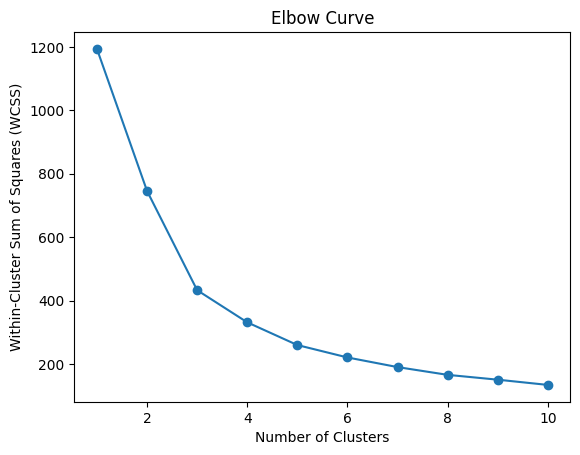

In [ ]:
# Specify the features for clustering
features = data[['job_title', 'salary_in_usd']]

# Apply feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering with different numbers of clusters
max_clusters = 10
wcss = []
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve')
plt.show()

from the elbow graph, 4 clusters is good

### Visualize the cluster

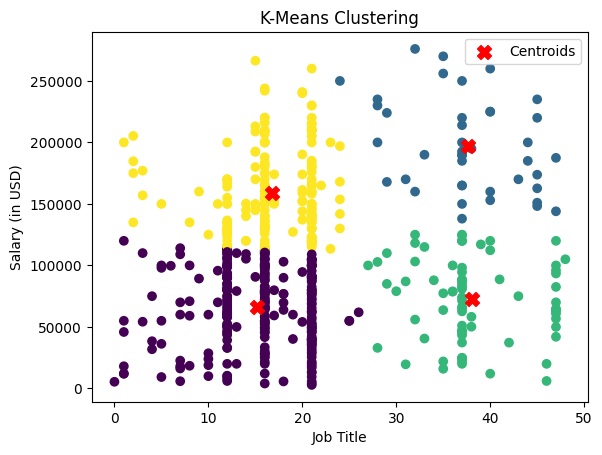

In [ ]:
# Specify the features for clustering
features = data[['job_title', 'salary_in_usd']]

# Apply feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means clustering with random initialization and repetitions
kmeans = KMeans(n_clusters=4, init='random', n_init=10, random_state=42)
kmeans.fit(scaled_features)

# Add the cluster labels to the dataframe
data['cluster'] = kmeans.labels_

# Get the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Visualize the clusters and centroids
plt.scatter(data['job_title'], data['salary_in_usd'], c=data['cluster'], cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100, label='Centroids')
plt.xlabel('Job Title')
plt.ylabel('Salary (in USD)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()